## Basic Preprocessing

In [1]:
using CSV, DataFrames, Plots, Random, DecisionTree, Statistics, LinearAlgebra, JuMP, Gurobi, NearestNeighbors

In [2]:
## Importing the data
bank=DataFrame(CSV.File("bank_presc_final.csv"))

,Column1,age,contact,campaign,pdays,previous,emp.var.rate,cons.price.idx
,Int64,Int64,String15,Int64,Int64,Int64,Float64,Float64
1,0,56,email,1,0,0,1.1,93.994
2,1,57,email,1,0,0,1.1,93.994
3,2,37,email,1,0,0,1.1,93.994
4,3,40,email,1,0,0,1.1,93.994
5,4,56,email,1,0,0,1.1,93.994
6,5,45,email,1,0,0,1.1,93.994
7,6,59,email,1,0,0,1.1,93.994
8,7,41,email,1,0,0,1.1,93.994
9,8,24,email,1,0,0,1.1,93.994


In [3]:
bank = bank[:,2:54]

,age,contact,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx
,Int64,String15,Int64,Int64,Int64,Float64,Float64,Float64
1,56,email,1,0,0,1.1,93.994,-36.4
2,57,email,1,0,0,1.1,93.994,-36.4
3,37,email,1,0,0,1.1,93.994,-36.4
4,40,email,1,0,0,1.1,93.994,-36.4
5,56,email,1,0,0,1.1,93.994,-36.4
6,45,email,1,0,0,1.1,93.994,-36.4
7,59,email,1,0,0,1.1,93.994,-36.4
8,41,email,1,0,0,1.1,93.994,-36.4
9,24,email,1,0,0,1.1,93.994,-36.4


In [4]:
names(bank)

53-element Vector{String}:
 "age"
 "contact"
 "campaign"
 "pdays"
 "previous"
 "emp.var.rate"
 "cons.price.idx"
 "cons.conf.idx"
 "euribor3m"
 "nr.employed"
 "y"
 "job_blue-collar"
 "job_entrepreneur"
 ⋮
 "day_of_week_wed"
 "month_aug"
 "month_dec"
 "month_jul"
 "month_jun"
 "month_mar"
 "month_may"
 "month_nov"
 "month_oct"
 "month_sep"
 "poutcome_nonexistent"
 "poutcome_success"

In [5]:
## Importing Libraries
using CSV, DataFrames, Plots, Random, DecisionTree, Statistics, LinearAlgebra, JuMP, Gurobi
using ScikitLearn,  MLDataUtils, CategoricalArrays
using StatsBase, TableTransforms

Creation of Features, Treatments and Outcome array

In [6]:
X = bank[:,:]
treatments = bank.contact;
outcomes = bank.y;

In [7]:
# Preprocessing of features array
select!(X, Not([:contact, :y]))

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Float64
1,56,1,0,0,1.1,93.994,-36.4,4.857
2,57,1,0,0,1.1,93.994,-36.4,4.857
3,37,1,0,0,1.1,93.994,-36.4,4.857
4,40,1,0,0,1.1,93.994,-36.4,4.857
5,56,1,0,0,1.1,93.994,-36.4,4.857
6,45,1,0,0,1.1,93.994,-36.4,4.857
7,59,1,0,0,1.1,93.994,-36.4,4.857
8,41,1,0,0,1.1,93.994,-36.4,4.857
9,24,1,0,0,1.1,93.994,-36.4,4.857


## Feature selection

In [8]:
@sk_import feature_selection: SelectFromModel
@sk_import ensemble : ExtraTreesClassifier

PyObject <class 'sklearn.ensemble._forest.ExtraTreesClassifier'>

In [9]:
## Feature selection using ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100)
clf = clf.fit(Matrix(X), outcomes)
clf.feature_importances_ 
model = SelectFromModel(clf, prefit=true)
X_new = model.transform(Matrix(X))

33104×13 Matrix{Float64}:
 56.0  1.0  0.0  0.0   1.1  93.994  -36.4  4.857  5191.0  1.0  0.0  0.0  0.0
 57.0  1.0  0.0  0.0   1.1  93.994  -36.4  4.857  5191.0  1.0  0.0  0.0  0.0
 37.0  1.0  0.0  0.0   1.1  93.994  -36.4  4.857  5191.0  1.0  1.0  0.0  0.0
 40.0  1.0  0.0  0.0   1.1  93.994  -36.4  4.857  5191.0  1.0  0.0  0.0  0.0
 56.0  1.0  0.0  0.0   1.1  93.994  -36.4  4.857  5191.0  1.0  0.0  1.0  0.0
 45.0  1.0  0.0  0.0   1.1  93.994  -36.4  4.857  5191.0  1.0  0.0  0.0  0.0
 59.0  1.0  0.0  0.0   1.1  93.994  -36.4  4.857  5191.0  1.0  0.0  0.0  0.0
 41.0  1.0  0.0  0.0   1.1  93.994  -36.4  4.857  5191.0  1.0  0.0  0.0  0.0
 24.0  1.0  0.0  0.0   1.1  93.994  -36.4  4.857  5191.0  0.0  1.0  0.0  0.0
 25.0  1.0  0.0  0.0   1.1  93.994  -36.4  4.857  5191.0  0.0  1.0  0.0  0.0
 41.0  1.0  0.0  0.0   1.1  93.994  -36.4  4.857  5191.0  1.0  0.0  0.0  0.0
 25.0  1.0  0.0  0.0   1.1  93.994  -36.4  4.857  5191.0  0.0  1.0  0.0  0.0
 29.0  1.0  0.0  0.0   1.1  93.994  -36.4  4.857  

In [10]:
## Features chosen
feature_idx = model.get_support()
feature_name = names(X)[feature_idx]

13-element Vector{String}:
 "age"
 "campaign"
 "pdays"
 "previous"
 "emp.var.rate"
 "cons.price.idx"
 "cons.conf.idx"
 "euribor3m"
 "nr.employed"
 "marital_married"
 "housing_yes"
 "loan_yes"
 "poutcome_success"

#### Splitting into train and test sets

In [11]:
seed = 1
(train_X, train_treatments, train_outcomes), (test_X, test_treatments, test_outcomes) =
    IAI.split_data(:policy_maximize, X, treatments, outcomes, seed=seed, train_proportion=0.5)

((16552×51 DataFrame
   Row │ age    campaign  pdays  previous  emp.var.rate  cons.price.idx  cons. ⋯
       │ Int64  Int64     Int64  Int64     Float64       Float64         Float ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │    57         1      0         0           1.1          93.994        ⋯
     2 │    40         1      0         0           1.1          93.994
     3 │    45         1      0         0           1.1          93.994
     4 │    41         1      0         0           1.1          93.994
     5 │    25         1      0         0           1.1          93.994        ⋯
     6 │    25         1      0         0           1.1          93.994
     7 │    57         1      0         0           1.1          93.994
     8 │    35         1      0         0           1.1          93.994
     9 │    54         1      0         0           1.1          93.994        ⋯
    10 │    35         1      0         0           1.1      

## Optimal Policy Tree

In order for the following code cells to be reproduced, an IAI license is required. Therefore, images of the resulting trees will be attached for reader's reference!

In [ ]:
grid = IAI.GridSearch(
    IAI.OptimalTreePrescriptionMaximizer(
        prescription_factor=0.6,
        treatment_minbucket=10,
        random_seed=5,
        max_categoric_levels_before_warning=15
    ),
    max_depth=2:5,
)
IAI.fit!(grid, train_X, train_treatments, train_outcomes)

In [26]:
IAI.get_learner(grid)

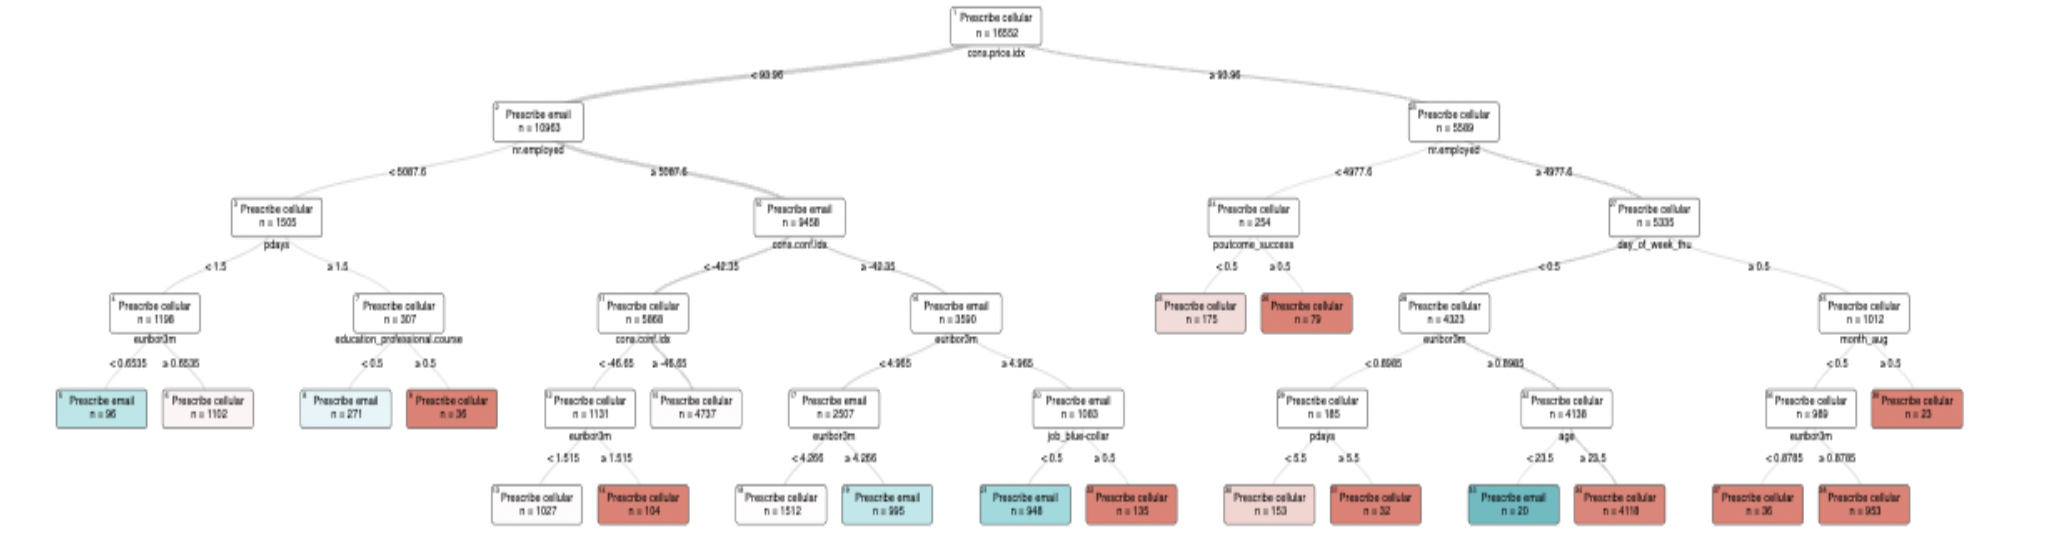

In [27]:
## Make Predictions
pred_treatments, pred_outcomes = IAI.predict(grid, test_X)

(String15["cellular", "cellular", "cellular", "cellular", "cellular", "cellular", "cellular", "cellular", "cellular", "cellular"  …  "cellular", "cellular", "cellular", "cellular", "cellular", "cellular", "cellular", "cellular", "cellular", "cellular"], [0.8787878787878788, 0.8787878787878788, 0.8787878787878788, 0.8787878787878788, 0.8787878787878788, 0.8787878787878788, 0.8787878787878788, 0.8787878787878788, 0.8787878787878788, 0.8787878787878788  …  0.3407407407407408, 0.7631578947368421, 0.3407407407407408, 0.3407407407407408, 0.7631578947368421, 0.3407407407407408, 0.3407407407407408, 0.7631578947368421, 0.3407407407407408, 0.3407407407407408])

In [28]:
IAI.predict_outcomes(grid, test_X)

,cellular,email
,Float64,Float64
1,0.878788,0.00685435
2,0.878788,0.00685435
3,0.878788,0.00685435
4,0.878788,0.00685435
5,0.878788,0.00685435
6,0.878788,0.00685435
7,0.878788,0.00685435
8,0.878788,0.00685435
9,0.878788,0.00685435


In [29]:
##Preparation of a reward learner

reward_lnr = IAI.CategoricalClassificationRewardEstimator(
    propensity_estimator=IAI.RandomForestClassifier(),
    outcome_estimator=IAI.RandomForestClassifier(),
    reward_estimator=:doubly_robust,
    random_seed=seed,
)    

Unfitted CategoricalClassificationRewardEstimator:
  propensity_estimator: Unfitted RandomForestClassifier
  outcome_estimator:    Unfitted RandomForestClassifier
  reward_estimator:     doubly_robust
  random_seed:          1

In [30]:
## Fitting and prediction of the reward learner

test_predictions, test_reward_score = IAI.fit_predict!(
    reward_lnr, test_X, test_treatments, test_outcomes,
    propensity_score_criterion=:auc, outcome_score_criterion=:auc)
test_rewards = test_predictions[:reward]


,cellular,email
,Float64,Float64
1,0.0634567,-2.13504e-5
2,0.0568391,0.0
3,0.0657784,-2.41785e-6
4,0.103931,-5.50328e-7
5,0.0784566,-9.29345e-7
6,0.0650207,0.0
7,0.090683,-2.58634e-7
8,0.0756609,-1.20837e-5
9,0.0845326,-9.08863e-7


In [31]:
## Calculation of propensity scores

test_reward_score

Dict{Symbol, Any} with 2 entries:
  :propensity => 0.939522
  :outcome    => Dict{String15, Float64}("cellular"=>0.887764, "email"=>0.82933…

In [32]:
## Calculation of average reward based on the predicted treatments

using Statistics
mean(test_rewards[i, pred_treatments[i]] for i = 1:size(test_X, 1))

0.12372323618350255

In [33]:
## Calculation of average reward based on the actual treatments

mean(test_rewards[i, test_treatments[i]] for i = 1:size(test_X, 1))

0.08700201593519223

### Conclusions


In prescription problems, it is complicated to evaluate the quality of a prescription policy because our data only contains the outcome for the treatment that was received. To resolve this, we utilize reward estimation, where so-called rewards are estimated for each treatment for each observation. These rewards indicate the relative credit a model should be given for prescribing each treatment to each observation, and thus can be used to evaluate the quality of the prescription policy. Our model’s internal outcome estimation models have AUCs of 88% for “cellular” and 82% for “email”, which suggests that the reward estimates are of good quality, and good to base our training on. 

The AUC for the propensity model is at 93%, which is very high, and suggests that our model is reliable in estimating the propensity. The doubly robust estimation method used for fitting the tree helps to tackle such an issue, as it is designed to deliver good results if either propensity scores or outcomes are estimated
well.

The average reward achieved through all prescriptions on our test set is 0.12 while the mean reward achieved under the actual treatment assignments was 0.08. We can see that the prescriptive tree policy improves by 50% using our tree model, a significant result on our goal to achieve greater returns from this campaign.